In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os 
import h5py
import sys
%matplotlib inline 

In [2]:
model_name = "1Layer.h5py"

In [3]:
# os.chdir('./../../../../../data/hongtao')
be = h5py.File('./../../../../../data/hongtao/variables_tt_re.h5','r')
bmu = h5py.File('./../../../../../data/hongtao/variables_tt_rmu.h5','r')
be1 = h5py.File('./../../../../../data/hongtao/variables_tt_re1.h5','r')
print(be.keys())
print('')
print(be1.keys())
dataset = be1

<KeysViewHDF5 ['j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt', 'j8_eta', 'j8_isbtag', 'j8_m', 'j8_phi', 'j8_pt', 'lep_eta', 'lep_m', 'lep_phi', 'lep_pt', 'met_met', 'met_phi', 'mttReco', 'mttTrue']>

<KeysViewHDF5 ['bh_eta', 'bh_phi', 'bh_pt', 'bl_eta', 'bl_phi', 'bl_pt', 'j1_DL1r', 'j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_DL1r', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_DL1r', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_DL1r', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_DL1r', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_DL1r', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_DL1r', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt'

In [4]:
input_keys = ['j1_pt', 'j1_eta', 'j1_phi', 'j1_m', 'j1_DL1r', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_m', 'j2_DL1r', 'j3_pt', 'j3_eta', 'j3_phi', 'j3_m', 'j3_DL1r', 'j4_pt', 'j4_eta', 'j4_phi', 'j4_m', 'j4_DL1r', 'j5_pt', 'j5_eta', 'j5_phi', 'j5_m', 'j5_DL1r', 'j6_pt', 'j6_eta', 'j6_phi', 'j6_m', 'j6_DL1r', 'j7_pt', 'j7_eta', 'j7_phi','j7_m', 'j7_DL1r', 'j8_pt', 'j8_eta', 'j8_phi','j8_m', 'j8_DL1r', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_m', 'met_met', 'met_phi'] 
output_keys = ['th_pt', 'th_eta','th_phi', 'tl_pt', 'tl_eta', 'tl_phi']
# output_keys = ['th_eta','th_phi', 'tl_eta', 'tl_phi']

output_length = len(output_keys)

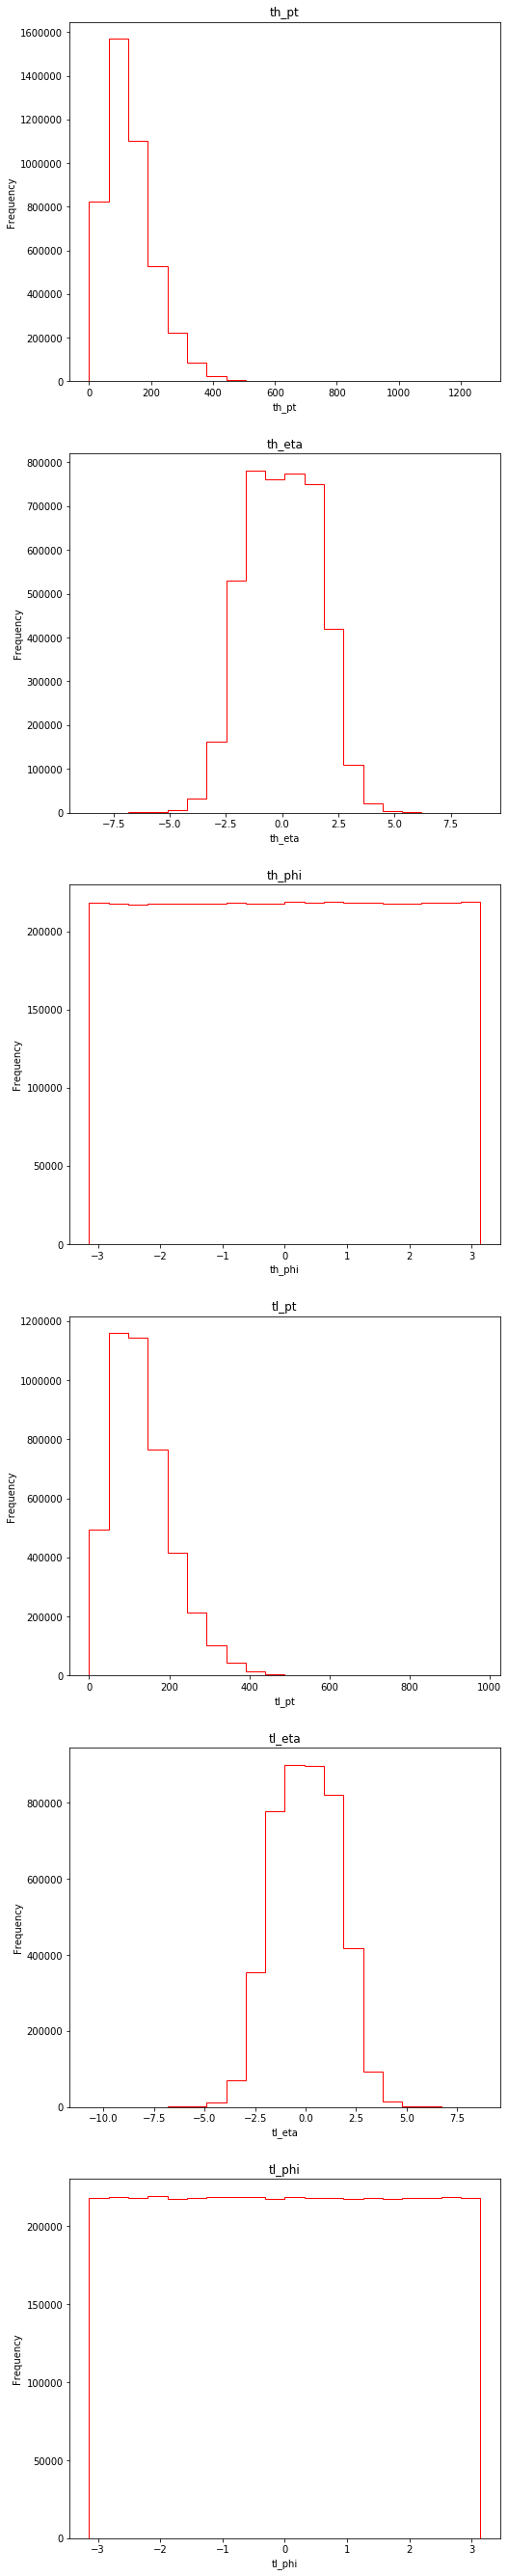

In [5]:
# Original variables

plt.figure(figsize=(8,8*output_length))
for i in range(0, output_length):
    plt.subplot(output_length,1,i+1)
    plt.hist(dataset.get(output_keys[i]), 20, histtype = 'step', color='r')
    plt.xlabel(output_keys[i])
    plt.ylabel('Frequency')
    plt.title(output_keys[i])

In [6]:
# Convert into numpy arrays and mean normalize
crop =  100000

input_arrays = []
output_arrays = [] 
in_std = []
in_mean = []
out_std = []
out_mean = []

# for key in input_keys:
#     exec(key + ' = np.array(dataset.get(key))[0:crop].reshape((1,-1))')
#     exec('{0} = ({0} - np.mean({0}))/np.std({0})'.format(key))
#     exec('input_arrays.append({0})'.format(key))

    
def convert_normalize(keys, std, mean, total):
    for x in keys:
        var = np.array(dataset.get(x))[0:crop].reshape((1,-1))
        sig = np.std(var)
        mu = np.mean(var)
        std.append(sig)
        mean.append(mu)
        var = (var - mu)/sig 
        total.append(var)

    
convert_normalize(input_keys, in_std, in_mean, input_arrays)
convert_normalize(output_keys, out_std, out_mean, output_arrays)

out_std = np.array(out_std).reshape((1,-1))
out_mean = np.array(out_mean).reshape((1,-1))
in_std = np.array(in_std).reshape((1,-1))
in_mean = np.array(in_mean).reshape((1,-1))

In [7]:
# Create input and test array
split = int(np.floor(0.8*crop)) # 80/20 split 
shuffle = True
    
total_input = np.stack(input_arrays).reshape((crop, len(input_keys)))
total_output = np.stack(output_arrays).reshape((crop, len(output_keys)))

if shuffle:
    rng_state = np.random.get_state()
    np.random.shuffle(total_input)
    np.random.set_state(rng_state)
    np.random.shuffle(total_output)
    
# size = total_input.shape
# total_input = np.array(np.random.normal(size=total_input.shape))

train_input, test_input = total_input[0:split, :], total_input[split:, :]
train_output, test_output = total_output[0:split,:], total_output[split:,:]

In [8]:
print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

(80000, 46) (80000, 6)
(20000, 46) (20000, 6)


In [9]:
# Build model

# optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5)
optimizer = keras.optimizers.Adam(learning_rate=1e-6)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


def build_model():
    model = keras.Sequential([
        layers.Dense(64,  input_shape=[len(input_keys)], activation='relu'),
        layers.Dense(len(output_keys), activation='linear')
    ])
    
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model 

# def build_model():
#     model = keras.Sequential([
#         layers.Dense(6, activation='linear', 
#                      input_shape=[len(input_keys)])])
    
#     model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    
#     return model 
    

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3008      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 3,398
Trainable params: 3,398
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit model

Epochs= 4096

history = model.fit(train_input, train_output, verbose=1, epochs=Epochs, 
                   validation_split=0.2, shuffle=True, callbacks=[callback],
                   batch_size=512)


Epoch 1/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.9418 - mse: 1.9418 - val_loss: 1.9324 - val_mse: 1.9324
Epoch 2/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.9360 - mse: 1.9360 - val_loss: 1.9267 - val_mse: 1.9267
Epoch 3/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.9303 - mse: 1.9303 - val_loss: 1.9210 - val_mse: 1.9210
Epoch 4/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9246 - mse: 1.9246 - val_loss: 1.9154 - val_mse: 1.9154
Epoch 5/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9189 - mse: 1.9189 - val_loss: 1.9098 - val_mse: 1.9098
Epoch 6/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9133 - mse: 1.9133 - val_loss: 1.9042 - val_mse: 1.9042
Epoch 7/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.9077 - mse: 1.9077 - val_loss: 1.8987 - val_mse: 1.8987
Epoch 8/4096
125/125 [==============================] - 0s 4ms

Epoch 62/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6490 - mse: 1.6490 - val_loss: 1.6426 - val_mse: 1.6426
Epoch 63/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.6451 - mse: 1.6451 - val_loss: 1.6386 - val_mse: 1.6386
Epoch 64/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6411 - mse: 1.6411 - val_loss: 1.6347 - val_mse: 1.6347
Epoch 65/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6372 - mse: 1.6372 - val_loss: 1.6308 - val_mse: 1.6308
Epoch 66/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6333 - mse: 1.6333 - val_loss: 1.6270 - val_mse: 1.6270
Epoch 67/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.6294 - mse: 1.6294 - val_loss: 1.6231 - val_mse: 1.6231
Epoch 68/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6255 - mse: 1.6255 - val_loss: 1.6193 - val_mse: 1.6193
Epoch 69/4096
125/125 [==============================] 

125/125 [==============================] - 0s 3ms/step - loss: 1.4478 - mse: 1.4478 - val_loss: 1.4436 - val_mse: 1.4436
Epoch 123/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4451 - mse: 1.4451 - val_loss: 1.4409 - val_mse: 1.4409
Epoch 124/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4423 - mse: 1.4423 - val_loss: 1.4381 - val_mse: 1.4381
Epoch 125/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4396 - mse: 1.4396 - val_loss: 1.4355 - val_mse: 1.4355
Epoch 126/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4369 - mse: 1.4369 - val_loss: 1.4328 - val_mse: 1.4328
Epoch 127/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.4342 - mse: 1.4342 - val_loss: 1.4301 - val_mse: 1.4301
Epoch 128/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4315 - mse: 1.4315 - val_loss: 1.4275 - val_mse: 1.4275
Epoch 129/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.3116 - mse: 1.3116 - val_loss: 1.3092 - val_mse: 1.3092
Epoch 183/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3098 - mse: 1.3098 - val_loss: 1.3074 - val_mse: 1.3074
Epoch 184/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3080 - mse: 1.3080 - val_loss: 1.3056 - val_mse: 1.3056
Epoch 185/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3062 - mse: 1.3062 - val_loss: 1.3039 - val_mse: 1.3039
Epoch 186/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3044 - mse: 1.3044 - val_loss: 1.3021 - val_mse: 1.3021
Epoch 187/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3027 - mse: 1.3027 - val_loss: 1.3004 - val_mse: 1.3004
Epoch 188/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3010 - mse: 1.3010 - val_loss: 1.2987 - val_mse: 1.2987
Epoch 189/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.2257 - mse: 1.2257 - val_loss: 1.2248 - val_mse: 1.2248
Epoch 243/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2246 - mse: 1.2246 - val_loss: 1.2237 - val_mse: 1.2237
Epoch 244/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2235 - mse: 1.2235 - val_loss: 1.2227 - val_mse: 1.2227
Epoch 245/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2224 - mse: 1.2224 - val_loss: 1.2216 - val_mse: 1.2216
Epoch 246/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.2214 - mse: 1.2214 - val_loss: 1.2206 - val_mse: 1.2206
Epoch 247/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.2203 - mse: 1.2203 - val_loss: 1.2195 - val_mse: 1.2195
Epoch 248/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.2193 - mse: 1.2193 - val_loss: 1.2185 - val_mse: 1.2185
Epoch 249/4096
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 3ms/step - loss: 1.1734 - mse: 1.1734 - val_loss: 1.1738 - val_mse: 1.1738
Epoch 303/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.1727 - mse: 1.1727 - val_loss: 1.1731 - val_mse: 1.1731
Epoch 304/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1721 - mse: 1.1721 - val_loss: 1.1724 - val_mse: 1.1724
Epoch 305/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1714 - mse: 1.1714 - val_loss: 1.1718 - val_mse: 1.1718
Epoch 306/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1707 - mse: 1.1707 - val_loss: 1.1711 - val_mse: 1.1711
Epoch 307/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1700 - mse: 1.1700 - val_loss: 1.1705 - val_mse: 1.1705
Epoch 308/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1694 - mse: 1.1694 - val_loss: 1.1698 - val_mse: 1.1698
Epoch 309/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.1393 - mse: 1.1393 - val_loss: 1.1404 - val_mse: 1.1404
Epoch 363/4096
125/125 [==============================] - 1s 4ms/step - loss: 1.1388 - mse: 1.1388 - val_loss: 1.1399 - val_mse: 1.1399
Epoch 364/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1383 - mse: 1.1383 - val_loss: 1.1395 - val_mse: 1.1395
Epoch 365/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1379 - mse: 1.1379 - val_loss: 1.1390 - val_mse: 1.1390
Epoch 366/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1374 - mse: 1.1374 - val_loss: 1.1386 - val_mse: 1.1386
Epoch 367/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1369 - mse: 1.1369 - val_loss: 1.1381 - val_mse: 1.1381
Epoch 368/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1365 - mse: 1.1365 - val_loss: 1.1377 - val_mse: 1.1377
Epoch 369/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 4ms/step - loss: 1.1153 - mse: 1.1153 - val_loss: 1.1170 - val_mse: 1.1170
Epoch 423/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.1150 - mse: 1.1150 - val_loss: 1.1166 - val_mse: 1.1166
Epoch 424/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1147 - mse: 1.1147 - val_loss: 1.1163 - val_mse: 1.1163
Epoch 425/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1143 - mse: 1.1143 - val_loss: 1.1160 - val_mse: 1.1160
Epoch 426/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.1140 - mse: 1.1140 - val_loss: 1.1157 - val_mse: 1.1157
Epoch 427/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.1137 - mse: 1.1137 - val_loss: 1.1154 - val_mse: 1.1154
Epoch 428/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.1133 - mse: 1.1133 - val_loss: 1.1150 - val_mse: 1.1150
Epoch 429/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.0982 - mse: 1.0982 - val_loss: 1.1003 - val_mse: 1.1003
Epoch 483/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0980 - mse: 1.0980 - val_loss: 1.1000 - val_mse: 1.1000
Epoch 484/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0977 - mse: 1.0977 - val_loss: 1.0998 - val_mse: 1.0998
Epoch 485/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0975 - mse: 1.0975 - val_loss: 1.0995 - val_mse: 1.0995
Epoch 486/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0972 - mse: 1.0972 - val_loss: 1.0993 - val_mse: 1.0993
Epoch 487/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0970 - mse: 1.0970 - val_loss: 1.0991 - val_mse: 1.0991
Epoch 488/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0968 - mse: 1.0968 - val_loss: 1.0989 - val_mse: 1.0989
Epoch 489/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.0857 - mse: 1.0857 - val_loss: 1.0881 - val_mse: 1.0881
Epoch 543/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0855 - mse: 1.0855 - val_loss: 1.0879 - val_mse: 1.0879
Epoch 544/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0854 - mse: 1.0854 - val_loss: 1.0878 - val_mse: 1.0878
Epoch 545/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0852 - mse: 1.0852 - val_loss: 1.0876 - val_mse: 1.0876
Epoch 546/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0850 - mse: 1.0850 - val_loss: 1.0874 - val_mse: 1.0874
Epoch 547/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0848 - mse: 1.0848 - val_loss: 1.0872 - val_mse: 1.0872
Epoch 548/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0847 - mse: 1.0847 - val_loss: 1.0871 - val_mse: 1.0871
Epoch 549/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 4ms/step - loss: 1.0764 - mse: 1.0764 - val_loss: 1.0791 - val_mse: 1.0791
Epoch 603/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0763 - mse: 1.0763 - val_loss: 1.0789 - val_mse: 1.0789
Epoch 604/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0761 - mse: 1.0761 - val_loss: 1.0788 - val_mse: 1.0788
Epoch 605/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0760 - mse: 1.0760 - val_loss: 1.0787 - val_mse: 1.0787
Epoch 606/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0759 - mse: 1.0759 - val_loss: 1.0786 - val_mse: 1.0786
Epoch 607/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0757 - mse: 1.0757 - val_loss: 1.0784 - val_mse: 1.0784
Epoch 608/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0756 - mse: 1.0756 - val_loss: 1.0783 - val_mse: 1.0783
Epoch 609/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.0692 - mse: 1.0692 - val_loss: 1.0721 - val_mse: 1.0721
Epoch 663/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0691 - mse: 1.0691 - val_loss: 1.0720 - val_mse: 1.0720
Epoch 664/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0690 - mse: 1.0690 - val_loss: 1.0719 - val_mse: 1.0719
Epoch 665/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0689 - mse: 1.0689 - val_loss: 1.0718 - val_mse: 1.0718
Epoch 666/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0688 - mse: 1.0688 - val_loss: 1.0717 - val_mse: 1.0717
Epoch 667/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0687 - mse: 1.0687 - val_loss: 1.0716 - val_mse: 1.0716
Epoch 668/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0686 - mse: 1.0686 - val_loss: 1.0715 - val_mse: 1.0715
Epoch 669/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 4ms/step - loss: 1.0634 - mse: 1.0634 - val_loss: 1.0666 - val_mse: 1.0666
Epoch 723/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0634 - mse: 1.0634 - val_loss: 1.0665 - val_mse: 1.0665
Epoch 724/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0633 - mse: 1.0633 - val_loss: 1.0665 - val_mse: 1.0665
Epoch 725/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0632 - mse: 1.0632 - val_loss: 1.0664 - val_mse: 1.0664
Epoch 726/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0631 - mse: 1.0631 - val_loss: 1.0663 - val_mse: 1.0663
Epoch 727/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0630 - mse: 1.0630 - val_loss: 1.0662 - val_mse: 1.0662
Epoch 728/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0629 - mse: 1.0629 - val_loss: 1.0661 - val_mse: 1.0661
Epoch 729/4096
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 3ms/step - loss: 1.0587 - mse: 1.0587 - val_loss: 1.0621 - val_mse: 1.0621
Epoch 783/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0586 - mse: 1.0586 - val_loss: 1.0620 - val_mse: 1.0620
Epoch 784/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0585 - mse: 1.0585 - val_loss: 1.0619 - val_mse: 1.0619
Epoch 785/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0585 - mse: 1.0585 - val_loss: 1.0619 - val_mse: 1.0619
Epoch 786/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0584 - mse: 1.0584 - val_loss: 1.0618 - val_mse: 1.0618
Epoch 787/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0583 - mse: 1.0583 - val_loss: 1.0617 - val_mse: 1.0617
Epoch 788/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0582 - mse: 1.0582 - val_loss: 1.0616 - val_mse: 1.0616
Epoch 789/4096
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 1.0546 - mse: 1.0546 - val_loss: 1.0582 - val_mse: 1.0582
Epoch 843/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0545 - mse: 1.0545 - val_loss: 1.0581 - val_mse: 1.0581
Epoch 844/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0545 - mse: 1.0545 - val_loss: 1.0581 - val_mse: 1.0581
Epoch 845/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0544 - mse: 1.0544 - val_loss: 1.0580 - val_mse: 1.0580
Epoch 846/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0544 - mse: 1.0544 - val_loss: 1.0579 - val_mse: 1.0579
Epoch 847/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0543 - mse: 1.0543 - val_loss: 1.0579 - val_mse: 1.0579
Epoch 848/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0542 - mse: 1.0542 - val_loss: 1.0578 - val_mse: 1.0578
Epoch 849/4096
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 1.0510 - mse: 1.0510 - val_loss: 1.0548 - val_mse: 1.0548
Epoch 903/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0510 - mse: 1.0510 - val_loss: 1.0547 - val_mse: 1.0547
Epoch 904/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0509 - mse: 1.0509 - val_loss: 1.0547 - val_mse: 1.0547
Epoch 905/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0509 - mse: 1.0509 - val_loss: 1.0546 - val_mse: 1.0546
Epoch 906/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0508 - mse: 1.0508 - val_loss: 1.0546 - val_mse: 1.0546
Epoch 907/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0508 - mse: 1.0508 - val_loss: 1.0545 - val_mse: 1.0545
Epoch 908/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0507 - mse: 1.0507 - val_loss: 1.0545 - val_mse: 1.0545
Epoch 909/4096
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 3ms/step - loss: 1.0479 - mse: 1.0479 - val_loss: 1.0518 - val_mse: 1.0518
Epoch 963/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0478 - mse: 1.0478 - val_loss: 1.0517 - val_mse: 1.0517
Epoch 964/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0478 - mse: 1.0478 - val_loss: 1.0517 - val_mse: 1.0517
Epoch 965/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0477 - mse: 1.0477 - val_loss: 1.0516 - val_mse: 1.0516
Epoch 966/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0477 - mse: 1.0477 - val_loss: 1.0516 - val_mse: 1.0516
Epoch 967/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0476 - mse: 1.0476 - val_loss: 1.0516 - val_mse: 1.0516
Epoch 968/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0476 - mse: 1.0476 - val_loss: 1.0515 - val_mse: 1.0515
Epoch 969/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 4ms/step - loss: 1.0450 - mse: 1.0450 - val_loss: 1.0491 - val_mse: 1.0491
Epoch 1023/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0450 - mse: 1.0450 - val_loss: 1.0490 - val_mse: 1.0490
Epoch 1024/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0449 - mse: 1.0449 - val_loss: 1.0490 - val_mse: 1.0490
Epoch 1025/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0449 - mse: 1.0449 - val_loss: 1.0490 - val_mse: 1.0490
Epoch 1026/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0448 - mse: 1.0448 - val_loss: 1.0489 - val_mse: 1.0489
Epoch 1027/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0448 - mse: 1.0448 - val_loss: 1.0489 - val_mse: 1.0489
Epoch 1028/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0447 - mse: 1.0447 - val_loss: 1.0488 - val_mse: 1.0488
Epoch 1029/4096
125/125 [==============================] 

Epoch 1082/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0424 - mse: 1.0424 - val_loss: 1.0466 - val_mse: 1.0466
Epoch 1083/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0424 - mse: 1.0424 - val_loss: 1.0466 - val_mse: 1.0466
Epoch 1084/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0423 - mse: 1.0423 - val_loss: 1.0465 - val_mse: 1.0465
Epoch 1085/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0423 - mse: 1.0423 - val_loss: 1.0465 - val_mse: 1.0465
Epoch 1086/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0422 - mse: 1.0422 - val_loss: 1.0465 - val_mse: 1.0465
Epoch 1087/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0422 - mse: 1.0422 - val_loss: 1.0464 - val_mse: 1.0464
Epoch 1088/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0421 - mse: 1.0421 - val_loss: 1.0464 - val_mse: 1.0464
Epoch 1089/4096
125/125 [================

Epoch 1142/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0400 - mse: 1.0400 - val_loss: 1.0444 - val_mse: 1.0444
Epoch 1143/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0399 - mse: 1.0399 - val_loss: 1.0443 - val_mse: 1.0443
Epoch 1144/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0399 - mse: 1.0399 - val_loss: 1.0443 - val_mse: 1.0443
Epoch 1145/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0399 - mse: 1.0399 - val_loss: 1.0442 - val_mse: 1.0442
Epoch 1146/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0398 - mse: 1.0398 - val_loss: 1.0442 - val_mse: 1.0442
Epoch 1147/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0398 - mse: 1.0398 - val_loss: 1.0442 - val_mse: 1.0442
Epoch 1148/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0398 - mse: 1.0398 - val_loss: 1.0441 - val_mse: 1.0441
Epoch 1149/4096
125/125 [================

Epoch 1202/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0378 - mse: 1.0378 - val_loss: 1.0423 - val_mse: 1.0423
Epoch 1203/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0377 - mse: 1.0377 - val_loss: 1.0422 - val_mse: 1.0422
Epoch 1204/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0377 - mse: 1.0377 - val_loss: 1.0422 - val_mse: 1.0422
Epoch 1205/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0376 - mse: 1.0376 - val_loss: 1.0422 - val_mse: 1.0422
Epoch 1206/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0376 - mse: 1.0376 - val_loss: 1.0421 - val_mse: 1.0421
Epoch 1207/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0376 - mse: 1.0376 - val_loss: 1.0421 - val_mse: 1.0421
Epoch 1208/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0375 - mse: 1.0375 - val_loss: 1.0421 - val_mse: 1.0421
Epoch 1209/4096
125/125 [================

Epoch 1262/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0357 - mse: 1.0357 - val_loss: 1.0403 - val_mse: 1.0403
Epoch 1263/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0357 - mse: 1.0357 - val_loss: 1.0403 - val_mse: 1.0403
Epoch 1264/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0356 - mse: 1.0356 - val_loss: 1.0403 - val_mse: 1.0403
Epoch 1265/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0356 - mse: 1.0356 - val_loss: 1.0402 - val_mse: 1.0402
Epoch 1266/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0356 - mse: 1.0356 - val_loss: 1.0402 - val_mse: 1.0402
Epoch 1267/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0355 - mse: 1.0355 - val_loss: 1.0402 - val_mse: 1.0402
Epoch 1268/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0355 - mse: 1.0355 - val_loss: 1.0401 - val_mse: 1.0401
Epoch 1269/4096
125/125 [================

Epoch 1322/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0338 - mse: 1.0338 - val_loss: 1.0385 - val_mse: 1.0385
Epoch 1323/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0337 - mse: 1.0337 - val_loss: 1.0385 - val_mse: 1.0385
Epoch 1324/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0337 - mse: 1.0337 - val_loss: 1.0385 - val_mse: 1.0385
Epoch 1325/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0337 - mse: 1.0337 - val_loss: 1.0384 - val_mse: 1.0384
Epoch 1326/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0336 - mse: 1.0336 - val_loss: 1.0384 - val_mse: 1.0384
Epoch 1327/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0336 - mse: 1.0336 - val_loss: 1.0384 - val_mse: 1.0384
Epoch 1328/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0336 - mse: 1.0336 - val_loss: 1.0383 - val_mse: 1.0383
Epoch 1329/4096
125/125 [================

Epoch 1382/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0319 - mse: 1.0319 - val_loss: 1.0368 - val_mse: 1.0368
Epoch 1383/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0319 - mse: 1.0319 - val_loss: 1.0368 - val_mse: 1.0368
Epoch 1384/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0319 - mse: 1.0319 - val_loss: 1.0368 - val_mse: 1.0368
Epoch 1385/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0319 - mse: 1.0319 - val_loss: 1.0368 - val_mse: 1.0368
Epoch 1386/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0318 - mse: 1.0318 - val_loss: 1.0367 - val_mse: 1.0367
Epoch 1387/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0318 - mse: 1.0318 - val_loss: 1.0367 - val_mse: 1.0367
Epoch 1388/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0318 - mse: 1.0318 - val_loss: 1.0367 - val_mse: 1.0367
Epoch 1389/4096
125/125 [================

Epoch 1442/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0302 - mse: 1.0302 - val_loss: 1.0353 - val_mse: 1.0353
Epoch 1443/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0302 - mse: 1.0302 - val_loss: 1.0352 - val_mse: 1.0352
Epoch 1444/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0302 - mse: 1.0302 - val_loss: 1.0352 - val_mse: 1.0352
Epoch 1445/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0302 - mse: 1.0302 - val_loss: 1.0352 - val_mse: 1.0352
Epoch 1446/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0301 - mse: 1.0301 - val_loss: 1.0352 - val_mse: 1.0352
Epoch 1447/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0301 - mse: 1.0301 - val_loss: 1.0351 - val_mse: 1.0351
Epoch 1448/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0301 - mse: 1.0301 - val_loss: 1.0351 - val_mse: 1.0351
Epoch 1449/4096
125/125 [================

Epoch 1502/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0286 - mse: 1.0286 - val_loss: 1.0338 - val_mse: 1.0338
Epoch 1503/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0286 - mse: 1.0286 - val_loss: 1.0337 - val_mse: 1.0337
Epoch 1504/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0286 - mse: 1.0286 - val_loss: 1.0337 - val_mse: 1.0337
Epoch 1505/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0286 - mse: 1.0286 - val_loss: 1.0337 - val_mse: 1.0337
Epoch 1506/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0285 - mse: 1.0285 - val_loss: 1.0337 - val_mse: 1.0337
Epoch 1507/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0285 - mse: 1.0285 - val_loss: 1.0337 - val_mse: 1.0337
Epoch 1508/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0285 - mse: 1.0285 - val_loss: 1.0336 - val_mse: 1.0336
Epoch 1509/4096
125/125 [================

Epoch 1562/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0271 - mse: 1.0271 - val_loss: 1.0324 - val_mse: 1.0324
Epoch 1563/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0271 - mse: 1.0271 - val_loss: 1.0324 - val_mse: 1.0324
Epoch 1564/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0271 - mse: 1.0271 - val_loss: 1.0323 - val_mse: 1.0323
Epoch 1565/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0271 - mse: 1.0271 - val_loss: 1.0323 - val_mse: 1.0323
Epoch 1566/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0270 - mse: 1.0270 - val_loss: 1.0323 - val_mse: 1.0323
Epoch 1567/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0270 - mse: 1.0270 - val_loss: 1.0323 - val_mse: 1.0323
Epoch 1568/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0270 - mse: 1.0270 - val_loss: 1.0322 - val_mse: 1.0322
Epoch 1569/4096
125/125 [================

Epoch 1622/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0257 - mse: 1.0257 - val_loss: 1.0311 - val_mse: 1.0311
Epoch 1623/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0257 - mse: 1.0257 - val_loss: 1.0311 - val_mse: 1.0311
Epoch 1624/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0257 - mse: 1.0257 - val_loss: 1.0310 - val_mse: 1.0310
Epoch 1625/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0257 - mse: 1.0257 - val_loss: 1.0310 - val_mse: 1.0310
Epoch 1626/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0256 - mse: 1.0256 - val_loss: 1.0310 - val_mse: 1.0310
Epoch 1627/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0256 - mse: 1.0256 - val_loss: 1.0310 - val_mse: 1.0310
Epoch 1628/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0256 - mse: 1.0256 - val_loss: 1.0310 - val_mse: 1.0310
Epoch 1629/4096
125/125 [================

Epoch 1682/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0244 - mse: 1.0244 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 1683/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0244 - mse: 1.0244 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 1684/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0244 - mse: 1.0244 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 1685/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0243 - mse: 1.0243 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 1686/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0243 - mse: 1.0243 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 1687/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0243 - mse: 1.0243 - val_loss: 1.0297 - val_mse: 1.0297
Epoch 1688/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0243 - mse: 1.0243 - val_loss: 1.0297 - val_mse: 1.0297
Epoch 1689/4096
125/125 [================

Epoch 1742/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0231 - mse: 1.0231 - val_loss: 1.0287 - val_mse: 1.0287
Epoch 1743/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0231 - mse: 1.0231 - val_loss: 1.0287 - val_mse: 1.0287
Epoch 1744/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0231 - mse: 1.0231 - val_loss: 1.0287 - val_mse: 1.0287
Epoch 1745/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0231 - mse: 1.0231 - val_loss: 1.0286 - val_mse: 1.0286
Epoch 1746/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0231 - mse: 1.0231 - val_loss: 1.0286 - val_mse: 1.0286
Epoch 1747/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0230 - mse: 1.0230 - val_loss: 1.0286 - val_mse: 1.0286
Epoch 1748/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0230 - mse: 1.0230 - val_loss: 1.0286 - val_mse: 1.0286
Epoch 1749/4096
125/125 [================

Epoch 1802/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0220 - mse: 1.0220 - val_loss: 1.0276 - val_mse: 1.0276
Epoch 1803/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0276 - val_mse: 1.0276
Epoch 1804/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0276 - val_mse: 1.0276
Epoch 1805/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0275 - val_mse: 1.0275
Epoch 1806/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0275 - val_mse: 1.0275
Epoch 1807/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0275 - val_mse: 1.0275
Epoch 1808/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0218 - mse: 1.0218 - val_loss: 1.0275 - val_mse: 1.0275
Epoch 1809/4096
125/125 [================

Epoch 1862/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0208 - mse: 1.0208 - val_loss: 1.0266 - val_mse: 1.0266
Epoch 1863/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0208 - mse: 1.0208 - val_loss: 1.0265 - val_mse: 1.0265
Epoch 1864/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0208 - mse: 1.0208 - val_loss: 1.0265 - val_mse: 1.0265
Epoch 1865/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0208 - mse: 1.0208 - val_loss: 1.0265 - val_mse: 1.0265
Epoch 1866/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0207 - mse: 1.0207 - val_loss: 1.0265 - val_mse: 1.0265
Epoch 1867/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0207 - mse: 1.0207 - val_loss: 1.0265 - val_mse: 1.0265
Epoch 1868/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0207 - mse: 1.0207 - val_loss: 1.0265 - val_mse: 1.0265
Epoch 1869/4096
125/125 [================

Epoch 1922/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0198 - mse: 1.0198 - val_loss: 1.0256 - val_mse: 1.0256
Epoch 1923/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 1.0256 - val_mse: 1.0256
Epoch 1924/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 1.0256 - val_mse: 1.0256
Epoch 1925/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 1.0255 - val_mse: 1.0255
Epoch 1926/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 1.0255 - val_mse: 1.0255
Epoch 1927/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0197 - mse: 1.0197 - val_loss: 1.0255 - val_mse: 1.0255
Epoch 1928/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0196 - mse: 1.0196 - val_loss: 1.0255 - val_mse: 1.0255
Epoch 1929/4096
125/125 [================

Epoch 1982/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 1.0247 - val_mse: 1.0247
Epoch 1983/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 1984/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 1985/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 1986/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 1987/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 1988/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0186 - mse: 1.0186 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 1989/4096
125/125 [================

Epoch 2042/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0178 - mse: 1.0178 - val_loss: 1.0238 - val_mse: 1.0238
Epoch 2043/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0178 - mse: 1.0178 - val_loss: 1.0238 - val_mse: 1.0238
Epoch 2044/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 1.0238 - val_mse: 1.0238
Epoch 2045/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 1.0238 - val_mse: 1.0238
Epoch 2046/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 1.0237 - val_mse: 1.0237
Epoch 2047/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 1.0237 - val_mse: 1.0237
Epoch 2048/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 1.0237 - val_mse: 1.0237
Epoch 2049/4096
125/125 [================

Epoch 2102/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0169 - mse: 1.0169 - val_loss: 1.0230 - val_mse: 1.0230
Epoch 2103/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0169 - mse: 1.0169 - val_loss: 1.0230 - val_mse: 1.0230
Epoch 2104/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0168 - mse: 1.0168 - val_loss: 1.0229 - val_mse: 1.0229
Epoch 2105/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0168 - mse: 1.0168 - val_loss: 1.0229 - val_mse: 1.0229
Epoch 2106/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0168 - mse: 1.0168 - val_loss: 1.0229 - val_mse: 1.0229
Epoch 2107/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0168 - mse: 1.0168 - val_loss: 1.0229 - val_mse: 1.0229
Epoch 2108/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0168 - mse: 1.0168 - val_loss: 1.0229 - val_mse: 1.0229
Epoch 2109/4096
125/125 [================

Epoch 2162/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0160 - mse: 1.0160 - val_loss: 1.0222 - val_mse: 1.0222
Epoch 2163/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0160 - mse: 1.0160 - val_loss: 1.0222 - val_mse: 1.0222
Epoch 2164/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0160 - mse: 1.0160 - val_loss: 1.0222 - val_mse: 1.0222
Epoch 2165/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0160 - mse: 1.0160 - val_loss: 1.0221 - val_mse: 1.0221
Epoch 2166/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0159 - mse: 1.0159 - val_loss: 1.0221 - val_mse: 1.0221
Epoch 2167/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0159 - mse: 1.0159 - val_loss: 1.0221 - val_mse: 1.0221
Epoch 2168/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0159 - mse: 1.0159 - val_loss: 1.0221 - val_mse: 1.0221
Epoch 2169/4096
125/125 [================

Epoch 2222/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0152 - mse: 1.0152 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2223/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0152 - mse: 1.0152 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2224/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0152 - mse: 1.0152 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2225/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0151 - mse: 1.0151 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2226/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0151 - mse: 1.0151 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2227/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0151 - mse: 1.0151 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2228/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0151 - mse: 1.0151 - val_loss: 1.0214 - val_mse: 1.0214
Epoch 2229/4096
125/125 [================

Epoch 2282/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0144 - mse: 1.0144 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2283/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0144 - mse: 1.0144 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2284/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0144 - mse: 1.0144 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2285/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0144 - mse: 1.0144 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2286/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0143 - mse: 1.0143 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2287/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0143 - mse: 1.0143 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2288/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0143 - mse: 1.0143 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2289/4096
125/125 [================

Epoch 2342/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0201 - val_mse: 1.0201
Epoch 2343/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0201 - val_mse: 1.0201
Epoch 2344/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0200 - val_mse: 1.0200
Epoch 2345/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0200 - val_mse: 1.0200
Epoch 2346/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0200 - val_mse: 1.0200
Epoch 2347/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0200 - val_mse: 1.0200
Epoch 2348/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0136 - mse: 1.0136 - val_loss: 1.0200 - val_mse: 1.0200
Epoch 2349/4096
125/125 [================

Epoch 2402/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2403/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2404/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2405/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2406/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2407/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2408/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 2409/4096
125/125 [================

Epoch 2462/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0123 - mse: 1.0123 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2463/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2464/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2465/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2466/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2467/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2468/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0122 - mse: 1.0122 - val_loss: 1.0188 - val_mse: 1.0188
Epoch 2469/4096
125/125 [================

Epoch 2522/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2523/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2524/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2525/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2526/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2527/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0116 - mse: 1.0116 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2528/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0115 - mse: 1.0115 - val_loss: 1.0182 - val_mse: 1.0182
Epoch 2529/4096
125/125 [================

Epoch 2582/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0110 - mse: 1.0110 - val_loss: 1.0177 - val_mse: 1.0177
Epoch 2583/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0110 - mse: 1.0110 - val_loss: 1.0177 - val_mse: 1.0177
Epoch 2584/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0110 - mse: 1.0110 - val_loss: 1.0177 - val_mse: 1.0177
Epoch 2585/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0110 - mse: 1.0110 - val_loss: 1.0177 - val_mse: 1.0177
Epoch 2586/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0110 - mse: 1.0110 - val_loss: 1.0177 - val_mse: 1.0177
Epoch 2587/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0109 - mse: 1.0109 - val_loss: 1.0177 - val_mse: 1.0177
Epoch 2588/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0109 - mse: 1.0109 - val_loss: 1.0176 - val_mse: 1.0176
Epoch 2589/4096
125/125 [================

Epoch 2642/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 2643/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 2644/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 2645/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 2646/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 1.0171 - val_mse: 1.0171
Epoch 2647/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 1.0171 - val_mse: 1.0171
Epoch 2648/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0103 - mse: 1.0103 - val_loss: 1.0171 - val_mse: 1.0171
Epoch 2649/4096
125/125 [================

Epoch 2702/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0167 - val_mse: 1.0167
Epoch 2703/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0167 - val_mse: 1.0167
Epoch 2704/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0167 - val_mse: 1.0167
Epoch 2705/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0167 - val_mse: 1.0167
Epoch 2706/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0166 - val_mse: 1.0166
Epoch 2707/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0166 - val_mse: 1.0166
Epoch 2708/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 1.0166 - val_mse: 1.0166
Epoch 2709/4096
125/125 [================

Epoch 2762/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2763/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2764/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2765/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2766/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2767/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2768/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0093 - mse: 1.0093 - val_loss: 1.0162 - val_mse: 1.0162
Epoch 2769/4096
125/125 [================

Epoch 2822/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0158 - val_mse: 1.0158
Epoch 2823/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 2824/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 2825/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 2826/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 2827/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 2828/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0087 - mse: 1.0087 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 2829/4096
125/125 [================

Epoch 2882/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2883/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2884/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2885/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2886/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2887/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2888/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0083 - mse: 1.0083 - val_loss: 1.0153 - val_mse: 1.0153
Epoch 2889/4096
125/125 [================

Epoch 2942/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2943/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2944/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2945/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2946/4096
125/125 [==============================] - 1s 4ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2947/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2948/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0078 - mse: 1.0078 - val_loss: 1.0149 - val_mse: 1.0149
Epoch 2949/4096
125/125 [================

Epoch 3002/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0074 - mse: 1.0074 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3003/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0074 - mse: 1.0074 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3004/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0074 - mse: 1.0074 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3005/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0074 - mse: 1.0074 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3006/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0074 - mse: 1.0074 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3007/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0074 - mse: 1.0074 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3008/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0073 - mse: 1.0073 - val_loss: 1.0145 - val_mse: 1.0145
Epoch 3009/4096
125/125 [================

Epoch 3062/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0142 - val_mse: 1.0142
Epoch 3063/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 3064/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 3065/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 3066/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 3067/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 3068/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 3069/4096
125/125 [================

Epoch 3122/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3123/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3124/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3125/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3126/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3127/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3128/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0065 - mse: 1.0065 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 3129/4096
125/125 [================

Epoch 3182/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0135 - val_mse: 1.0135
Epoch 3183/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 3184/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 3185/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 3186/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 3187/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 3188/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 3189/4096
125/125 [================

Epoch 3242/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0058 - mse: 1.0058 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3243/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0058 - mse: 1.0058 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3244/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0058 - mse: 1.0058 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3245/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0058 - mse: 1.0058 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3246/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0057 - mse: 1.0057 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3247/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0057 - mse: 1.0057 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3248/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0057 - mse: 1.0057 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 3249/4096
125/125 [================

Epoch 3302/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3303/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3304/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3305/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3306/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3307/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3308/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0128 - val_mse: 1.0128
Epoch 3309/4096
125/125 [================

Epoch 3362/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0051 - mse: 1.0051 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3363/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0051 - mse: 1.0051 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3364/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0051 - mse: 1.0051 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3365/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0050 - mse: 1.0050 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3366/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0050 - mse: 1.0050 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3367/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0050 - mse: 1.0050 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3368/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0050 - mse: 1.0050 - val_loss: 1.0125 - val_mse: 1.0125
Epoch 3369/4096
125/125 [================

Epoch 3422/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3423/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3424/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3425/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3426/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3427/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3428/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0047 - mse: 1.0047 - val_loss: 1.0122 - val_mse: 1.0122
Epoch 3429/4096
125/125 [================

Epoch 3482/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0120 - val_mse: 1.0120
Epoch 3483/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0120 - val_mse: 1.0120
Epoch 3484/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0120 - val_mse: 1.0120
Epoch 3485/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0120 - val_mse: 1.0120
Epoch 3486/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0119 - val_mse: 1.0119
Epoch 3487/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0119 - val_mse: 1.0119
Epoch 3488/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 1.0119 - val_mse: 1.0119
Epoch 3489/4096
125/125 [================

Epoch 3542/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3543/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3544/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3545/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3546/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3547/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3548/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0041 - mse: 1.0041 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 3549/4096
125/125 [================

Epoch 3602/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0115 - val_mse: 1.0115
Epoch 3603/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0115 - val_mse: 1.0115
Epoch 3604/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0115 - val_mse: 1.0115
Epoch 3605/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0114 - val_mse: 1.0114
Epoch 3606/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0114 - val_mse: 1.0114
Epoch 3607/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0114 - val_mse: 1.0114
Epoch 3608/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0038 - mse: 1.0038 - val_loss: 1.0114 - val_mse: 1.0114
Epoch 3609/4096
125/125 [================

Epoch 3662/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3663/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3664/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3665/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3666/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3667/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3668/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0112 - val_mse: 1.0112
Epoch 3669/4096
125/125 [================

Epoch 3722/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0033 - mse: 1.0033 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3723/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0033 - mse: 1.0033 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3724/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0032 - mse: 1.0032 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3725/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0032 - mse: 1.0032 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3726/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0032 - mse: 1.0032 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3727/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0032 - mse: 1.0032 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3728/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0032 - mse: 1.0032 - val_loss: 1.0110 - val_mse: 1.0110
Epoch 3729/4096
125/125 [================

Epoch 3782/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3783/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3784/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3785/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3786/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3787/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3788/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0108 - val_mse: 1.0108
Epoch 3789/4096
125/125 [================

Epoch 3842/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0106 - val_mse: 1.0106
Epoch 3843/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0106 - val_mse: 1.0106
Epoch 3844/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0106 - val_mse: 1.0106
Epoch 3845/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0106 - val_mse: 1.0106
Epoch 3846/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0106 - val_mse: 1.0106
Epoch 3847/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0105 - val_mse: 1.0105
Epoch 3848/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0105 - val_mse: 1.0105
Epoch 3849/4096
125/125 [================

Epoch 3902/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0104 - val_mse: 1.0104
Epoch 3903/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0104 - val_mse: 1.0104
Epoch 3904/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0104 - val_mse: 1.0104
Epoch 3905/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0104 - val_mse: 1.0104
Epoch 3906/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0103 - val_mse: 1.0103
Epoch 3907/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0103 - val_mse: 1.0103
Epoch 3908/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0025 - mse: 1.0025 - val_loss: 1.0103 - val_mse: 1.0103
Epoch 3909/4096
125/125 [================

Epoch 3962/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0023 - mse: 1.0023 - val_loss: 1.0102 - val_mse: 1.0102
Epoch 3963/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0023 - mse: 1.0023 - val_loss: 1.0102 - val_mse: 1.0102
Epoch 3964/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0023 - mse: 1.0023 - val_loss: 1.0102 - val_mse: 1.0102
Epoch 3965/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0023 - mse: 1.0023 - val_loss: 1.0102 - val_mse: 1.0102
Epoch 3966/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0102 - val_mse: 1.0102
Epoch 3967/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0101 - val_mse: 1.0101
Epoch 3968/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0101 - val_mse: 1.0101
Epoch 3969/4096
125/125 [================

Epoch 4022/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4023/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4024/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4025/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4026/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4027/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4028/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0020 - mse: 1.0020 - val_loss: 1.0100 - val_mse: 1.0100
Epoch 4029/4096
125/125 [================

Epoch 4082/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4083/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4084/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4085/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4086/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4087/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4088/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 4089/4096
125/125 [================

In [12]:
history.history.keys()
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 1Layer.h5py/assets


Text(0.5, 1.0, 'MSE loss')

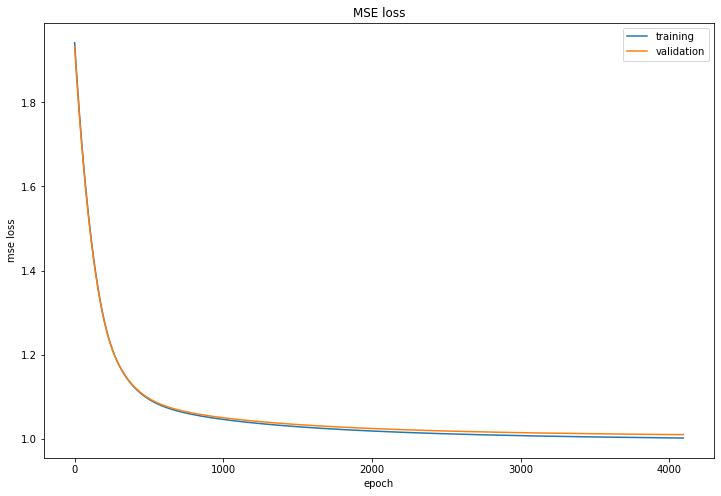

In [13]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.legend()
plt.title('MSE loss')

In [14]:
predictions = model.predict(test_input)

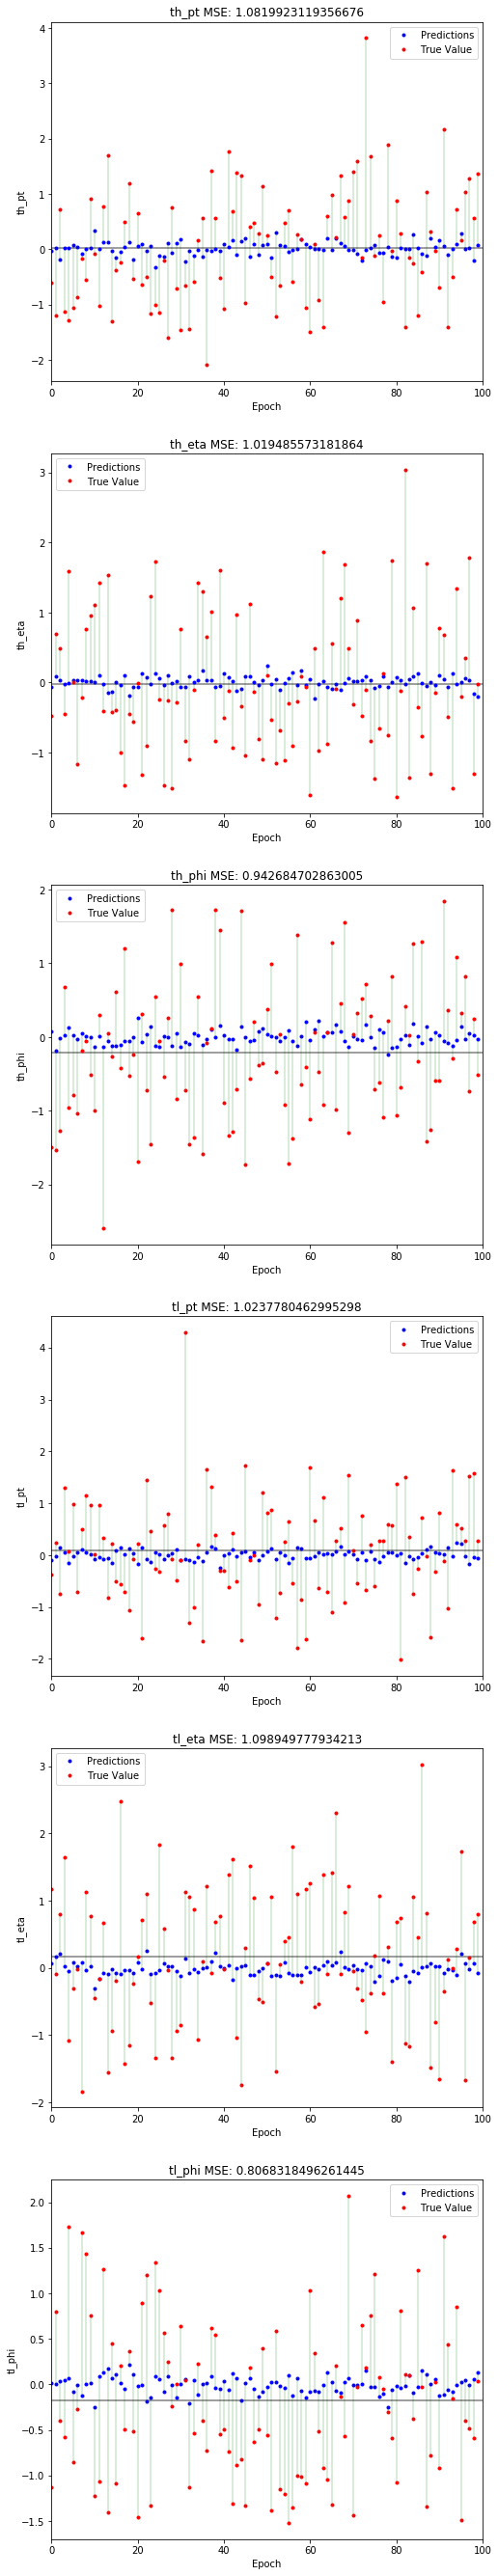

In [15]:
# Training 
crop = 100 

train_small = model.predict(train_input[0:100,:])
output_small = train_output[0:100,:]

def comparison_plot(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0,output_length):
        plt.subplot(output_length,1,i+1)
        plt.plot(range(0,crop), compare[:,i], 'bo', markersize=3, label = 'Predictions')
        plt.plot(range(0,crop), true[:,i], 'ro', markersize=3, label = 'True Value')
        ym, yM = plt.ylim()
        for x in range(100):
            plt.vlines(x, color='g', linestyle='-', alpha=0.2, ymin= 
                        min(compare[x,i], true[x,i]), 
                        ymax= max(compare[x,i], true[x,i]))
        plt.hlines(np.mean(true[:,i]), xmin=-20, xmax=crop+20, alpha=0.5)
        MSE = 1/compare[:,i].size*np.sum((compare[:,i]- true[:,i])**2)
        plt.xlabel('Epoch')
        plt.ylabel(output_keys[i])
        plt.xlim(0, crop)
        plt.title(output_keys[i] + " MSE: " + str(MSE))
        plt.legend()

comparison_plot(train_small, output_small)

In [16]:
# Predictions

predictions_small = predictions[0:crop,:]
test_output_small = test_output[0:crop,:]

MSE = 1/predictions.size*np.sum((predictions- test_output)**2)
print("total MSE: " + str(MSE))

for i in range(output_length):
    MSE = 1/predictions[:,i].size*np.sum((predictions[:,i] -test_output[:,i])**2)
    print("{0} MSE : ".format(output_keys[i]), '%.10f'%MSE)

total MSE: 1.0108913776956476
th_pt MSE :  1.0209310299
th_eta MSE :  1.0192968835
th_phi MSE :  0.9852518767
tl_pt MSE :  1.0172229202
tl_eta MSE :  1.0097655823
tl_phi MSE :  1.0128799735


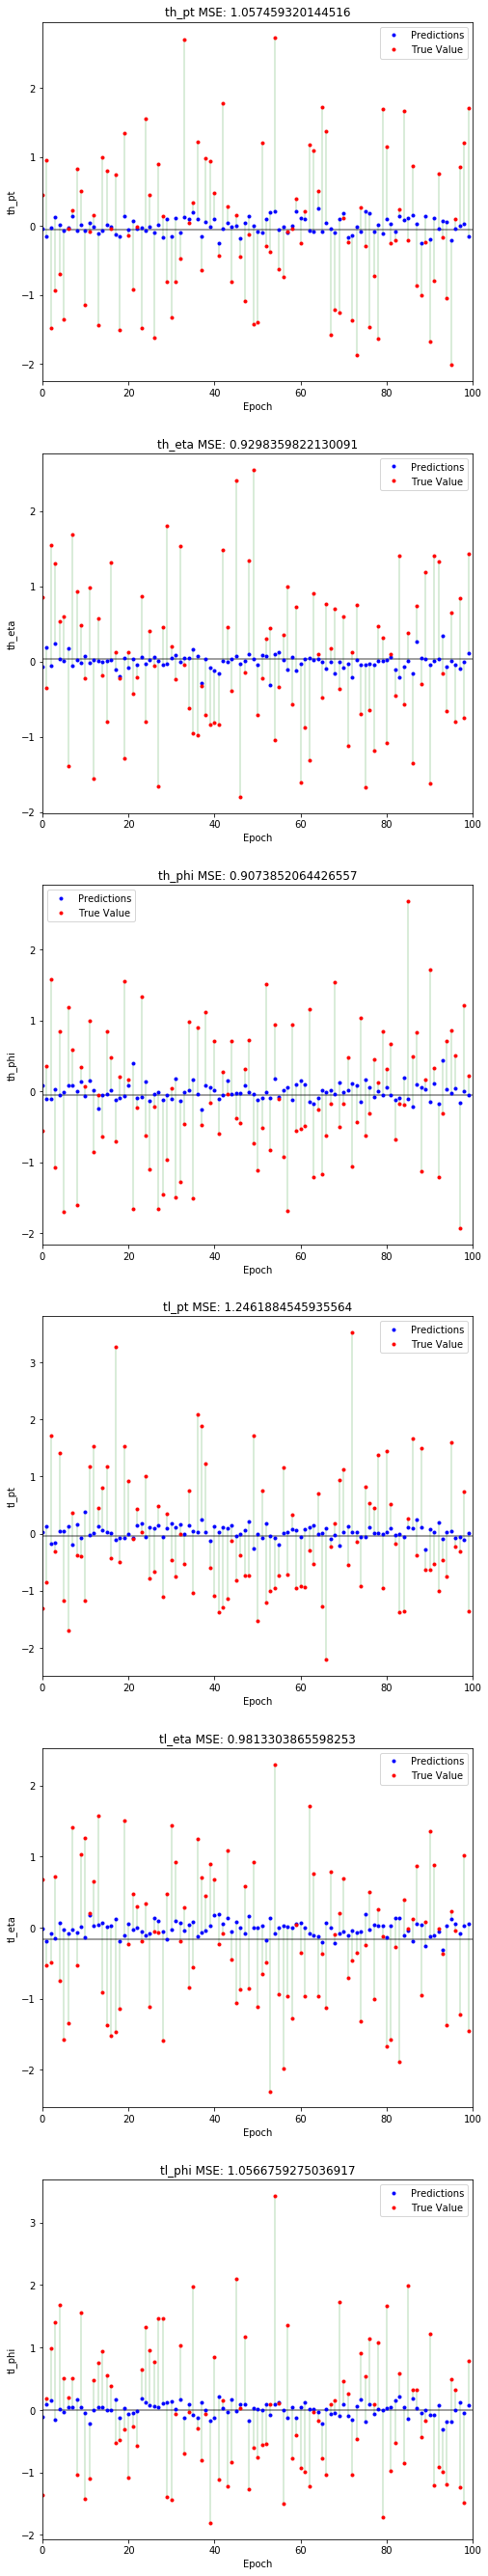

In [17]:
comparison_plot(predictions_small, test_output_small)

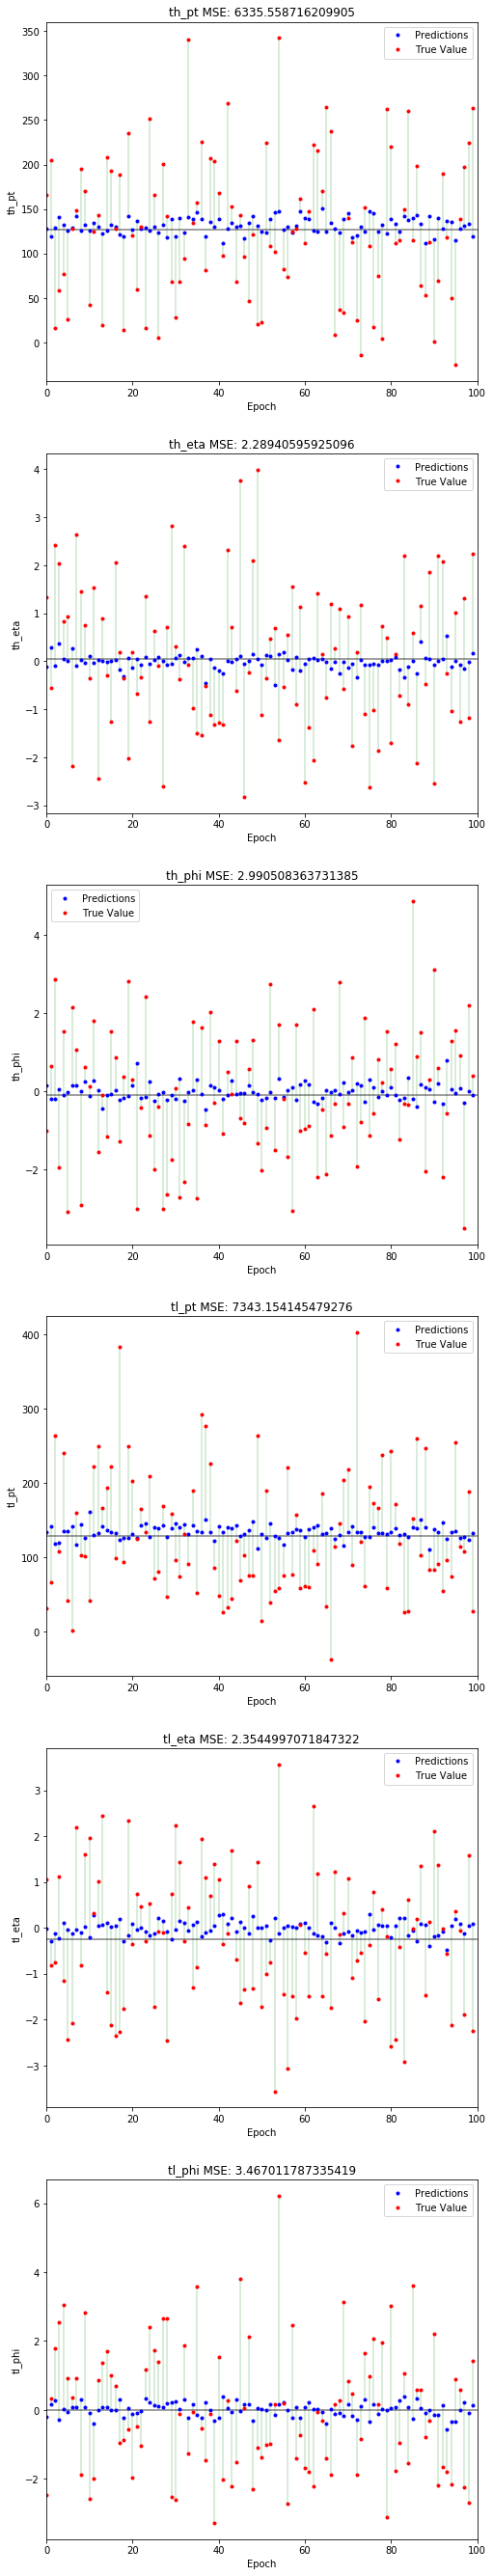

In [18]:
# Back to original units 

scaled_predictions = predictions*out_std + out_mean
scaled_output = test_output*out_std + out_mean

comparison_plot(scaled_predictions[0:crop,:], scaled_output[0:crop,:])


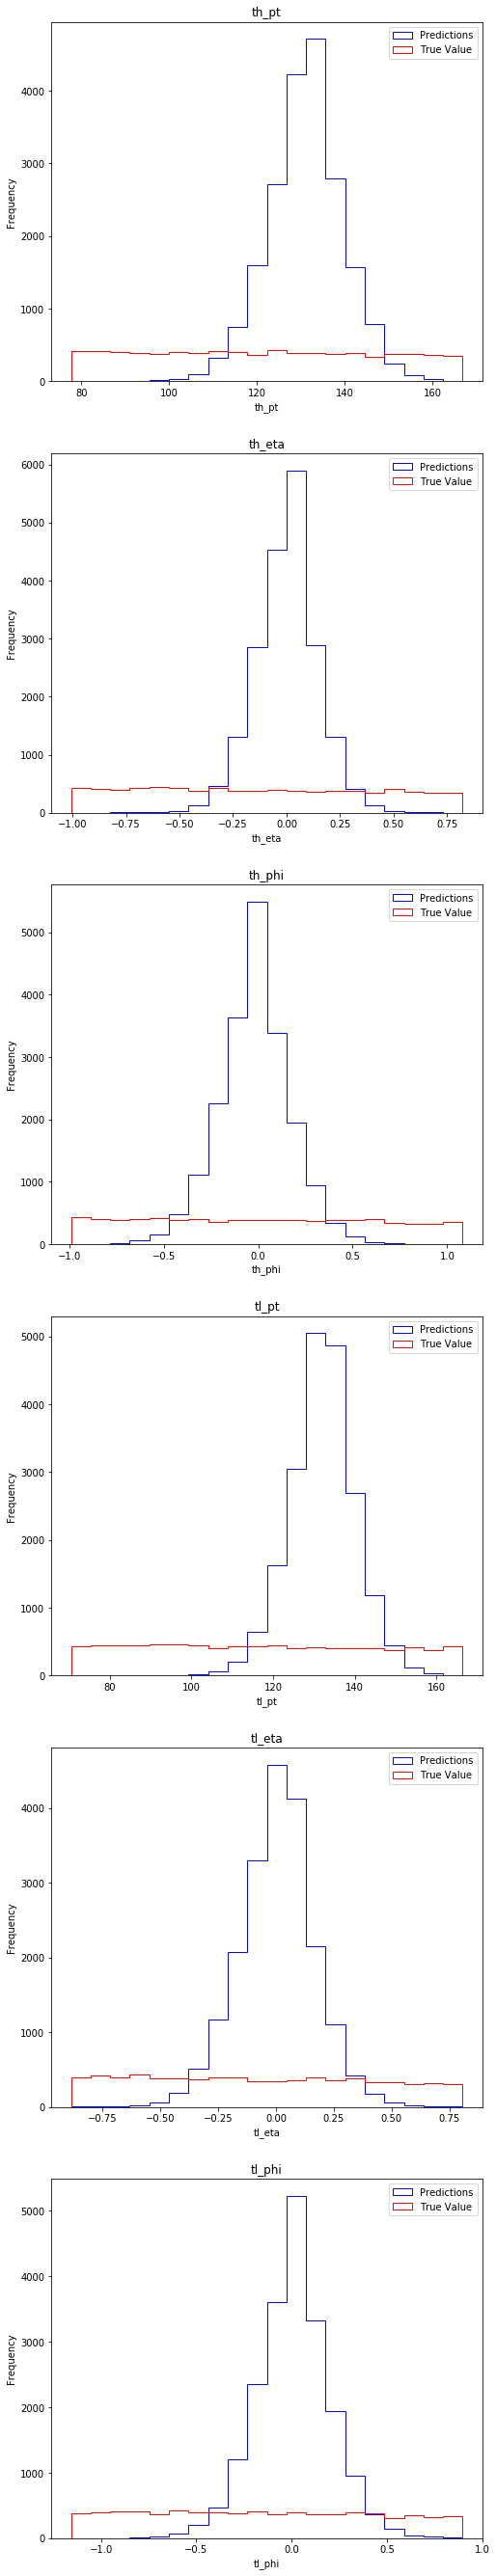

In [19]:
# Histograms 

def histograms(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(compare[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histograms(scaled_predictions, scaled_output)